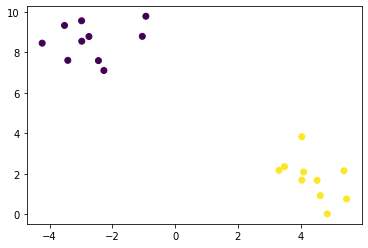

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=20, centers=2, n_features=2, random_state=42)

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

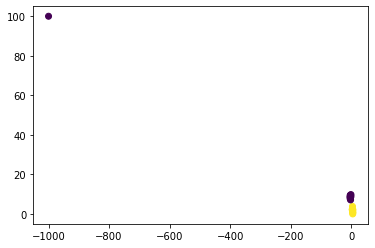

In [2]:
outlier = np.array([-1000, 100])
outlier_y = 0

x2 = np.vstack((outlier, x))
y2 = np.append(outlier_y, y)
plt.scatter(x2[:, 0], x2[:, 1], c=y2)
plt.show()

<h3>Effect of an outlier</h3>

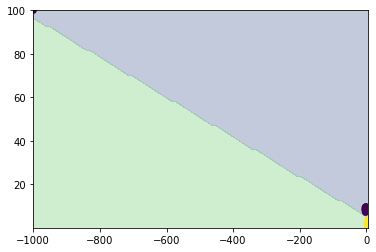

In [3]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()
linearModel.fit(x2, y2)

x1_min = np.min(x2[:, 0])
x2_min = np.min(x2[:, 1])
x1_max = np.max(x2[:, 0])
x2_max = np.max(x2[:, 1])

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
xPredict = np.vstack((xx1.flatten(), xx2.flatten()))

targets = linearModel.predict(xPredict.T)

plt.contourf(xx1, xx2, np.reshape(targets>.5, np.shape(xx1)), levels=1, alpha=0.3)
plt.scatter(x2[:, 0], x2[:, 1], c=y2)
plt.show()

<h3>Effect of not having the outlier</h1>

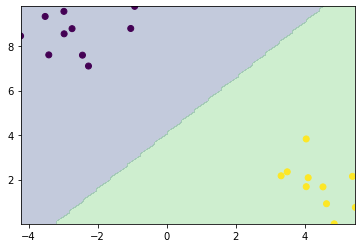

In [4]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()
linearModel.fit(x, y)

x1_min = np.min(x[:, 0])
x2_min = np.min(x[:, 1])
x1_max = np.max(x[:, 0])
x2_max = np.max(x[:, 1])

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
xPredict = np.vstack((xx1.flatten(), xx2.flatten()))

targets = linearModel.predict(xPredict.T)

plt.contourf(xx1, xx2, np.reshape(targets>.5, np.shape(xx1)), levels=1, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

<p>Basically, the model is extremely sensitive to an outlier</p>

<h3>Logistic regression without an outlier</h3>

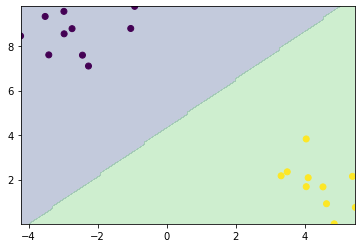

In [5]:
from sklearn.linear_model import LogisticRegression

logisticModel = LogisticRegression()
logisticModel.fit(x, y)

x1_min_0 = np.min(x[:, 0])
x2_min_0 = np.min(x[:, 1])
x1_max_0 = np.max(x[:, 0])
x2_max_0 = np.max(x[:, 1])

xx1, xx2 = np.meshgrid(np.linspace(x1_min_0, x1_max_0, 100), np.linspace(x2_min_0, x2_max_0, 100))
xPredict = np.vstack((xx1.flatten(), xx2.flatten()))

targets = logisticModel.predict(xPredict.T)

plt.contourf(xx1, xx2, np.reshape(targets>.5, np.shape(xx1)), levels=1, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

<h3>Logistic regression with an outlier</h3>

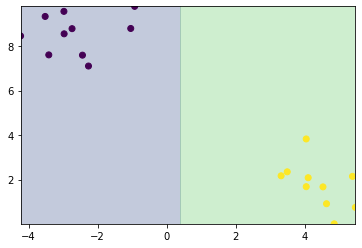

In [8]:
from sklearn.linear_model import LogisticRegression

logisticModel = LogisticRegression()
logisticModel.fit(x2, y2)

x1_min = np.min(x2[:, 0])
x2_min = np.min(x2[:, 1])
x1_max = np.max(x2[:, 0])
x2_max = np.max(x2[:, 1])

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
xPredict = np.vstack((xx1.flatten(), xx2.flatten()))

targets = logisticModel.predict(xPredict.T)

plt.contourf(xx1, xx2, np.reshape(targets>.5, np.shape(xx1)), levels=1, alpha=0.3)
plt.scatter(x2[1:, 0], x2[1:, 1], c=y2[1:])
axes = plt.gca()
axes.set_xlim([x1_min_0, x1_max_0])
axes.set_ylim([x2_min_0, x2_max_0])
plt.show()